In [1]:
import sys,array
import matplotlib.pyplot as plt
from ROOT import TFile
import root_numpy as rn
import numpy as np
import pandas as pd
import math
from matplotlib.colors import LogNorm
import matplotlib
from ROOT import larutil

%matplotlib inline
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.weight'] = 'bold'


In [12]:
#MC BNB + Cosmics 
#fmcc8 ='all_samples_staged_trees.root'
fmcc8 = 'CCpi0hist_staged_trees.root'
a = rn.root2array(fmcc8,treename='postfm_tree')
df = pd.DataFrame(a)

df['noabs_angle'] = df.dcosxlong.values * df.dcosxshort +\
                     df.dcosy_long.values * df.dcosyshort +\
                    df.dcoszlong.values * df.dcoszshort
df['dedx_ratio'] = df.dedx_start / df.dedx_end
df['dedx_ratio2'] = df.dedx_start2 / df.dedx_end2
df['st1'] = df.start_y > df.start_y_2nd
df['st2'] = df.start_y > df.end_y_2nd
df['e1'] = df.end_y > df.start_y_2nd
df['e2'] = df.end_y > df.end_y_2nd
df['jhighlong'] = np.where((df['st1'] & df['st2']) | (df['e1'] & df['e2']),1,0) 

################################################################
b = rn.root2array(fmcc8,treename='tree')
df_af = pd.DataFrame(b)

df_af['noabs_angle'] = df_af.dcosxlong.values * df_af.dcosxshort +\
                     df_af.dcosy_long.values * df_af.dcosyshort +\
                    df_af.dcoszlong.values * df_af.dcoszshort  
df_af['dedx_ratio'] = df_af.dedx_start / df_af.dedx_end
df_af['dedx_ratio2'] = df_af.dedx_start2 / df_af.dedx_end2
df_af['st1'] = df_af.start_y > df_af.start_y_2nd
df_af['st2'] = df_af.start_y > df_af.end_y_2nd
df_af['e1'] = df_af.end_y > df_af.start_y_2nd
df_af['e2'] = df_af.end_y > df_af.end_y_2nd
df_af['jhighlong'] = np.where((df_af['st1'] & df_af['st2']) | (df_af['e1'] & df_af['e2']),1,0) 

In [17]:
t = df.groupby('sample')#['event_ahack','tracklenlong','mult']#.max()
#print t.first()
#print df.shape[0]

471571


In [4]:
df_beam = df.query('sample == 0')
df_offbeam = df.query('sample == 1')
df_bnbcos = df.query('sample == 2')

df_beam_2 = df.query('sample == 0 and mult == 2')
df_offbeam_2 = df.query('sample == 1 and mult == 2')
df_bnbcos_2 = df.query('sample == 2 and mult == 2')

df_beam_gt1 = df.query('sample == 0 and mult > 1')
df_offbeam_gt1 = df.query('sample == 1 and mult > 1')
df_bnbcos_gt1 = df.query('sample == 2 and mult > 1')

df_beam_1 = df.query('sample == 0 and mult == 1')
df_offbeam_1 = df.query('sample == 1 and mult == 1')
df_bnbcos_1 = df.query('sample == 2 and mult == 1')

df_beam_f = df_af.query('sample == 0')
df_offbeam_f = df_af.query('sample == 1')
df_bnbcos_f = df_af.query('sample == 2')

df_beam_f_2 = df_af.query('sample == 0 and mult == 2')
df_offbeam_f_2 = df_af.query('sample == 1 and mult == 2')
df_bnbcos_f_2 = df_af.query('sample == 2 and mult == 2')

df_beam_f_gt1 = df_af.query('sample == 0 and mult > 1')
df_offbeam_f_gt1 = df_af.query('sample == 1 and mult > 1')
df_bnbcos_f_gt1 = df_af.query('sample == 2 and mult > 1')


In [5]:
tot_on = 525613
tot_off = 379202
tot_bnbcos = 101600

int_per_1e20POT = 99035.2 
dataPOT = 0.495 * (tot_on) / 547616  
mcbnbcos_POT = float(tot_bnbcos)/int_per_1e20POT 

off_to_on = 1.23 * (382718./tot_off) * (tot_on/547616.)
mc_to_onbeam = dataPOT/mcbnbcos_POT

print "MC to OnBeam : ", mc_to_onbeam
print "Off to OnBeam: ",off_to_on

MC to OnBeam :  0.463117341354
Off to OnBeam:  1.19152552442


In [22]:
#print t.first() #['mult'].first()
print df_beam_2.shape[0] - off_to_on * df_offbeam_2.shape[0]
print df_bnbcos_2.shape[0] * mc_to_onbeam

print df_beam.shape[0] - off_to_on * df_offbeam.shape[0]
print df_bnbcos.shape[0] * mc_to_onbeam

23951.7441979
26616.2798423
74785.8051735
76972.4177198


In [7]:
# Cuts on dataframes 
df_beam_cut = df_beam_2.query('angleBtnTracks < 0.9 and ((jhighlong == 1 and (dcosy_long <= 0.67 \
                               or tracklenshort >= 60)) or jhighlong == 0) and (((dedx_ratio <= 1 or \
                           dedx_start >= 2.5 or dedx_end >= 4) and end_y_2nd <= \
                           96.5) or tracklenshort >= 30)')
df_offbeam_cut = df_offbeam_2.query('angleBtnTracks < 0.9 and ((jhighlong == 1 and (dcosy_long <= 0.67 \
                               or tracklenshort >= 60)) or jhighlong == 0) and (((dedx_ratio <= 1 or\
                           dedx_start >= 2.5 or dedx_end >= 4) and end_y_2nd <=\
                           96.5) or tracklenshort >= 30)')
df_bnbcos_cut = df_bnbcos_2.query('angleBtnTracks < 0.9 and ((jhighlong == 1 and (dcosy_long <= 0.67 \
                               or tracklenshort >= 60)) or jhighlong == 0) and (((dedx_ratio <= 1 or\
                           dedx_start >= 2.5 or dedx_end >= 4) and end_y_2nd <=\
                           96.5) or tracklenshort >= 30)')

beam_cut = df_beam_cut.groupby(['event_ahack']).count() #['mult'] #.max()
offbeam_cut = df_offbeam_cut.groupby(['event_ahack']).count() #['mult'] #.max()
bnbcos_cut = df_bnbcos_cut.groupby(['event_ahack']).count()

In [8]:
df_beam_cut2 = df_beam_2.query('(((dedx_ratio2 <= 1 or dedx_start2 >= 2.5 or dedx_end2 >= 4) and end_y_2nd <=\
                           96.5) or tracklenshort >= 30)')
df_offbeam_cut2 = df_offbeam_2.query('(((dedx_ratio2 <= 1 or dedx_start2 >= 2.5 or dedx_end2 >= 4) and end_y_2nd <=\
                           96.5) or tracklenshort >= 30)')
df_bnbcos_cut2 = df_bnbcos_2.query('(((dedx_ratio2 <= 1 or dedx_start2 >= 2.5 or dedx_end2 >= 4) and end_y_2nd <=\
                           96.5) or tracklenshort >= 30)')

df_beam_2_cut3a = df_beam_cut2.query('(jhighlong == 1 and (dcosy_long <= 0.67 \
                                         or tracklenshort >= 60)) or jhighlong == 0')
df_offbeam_2_cut3a = df_offbeam_cut2.query('(jhighlong == 1 and (dcosy_long <= 0.67 \
                                         or tracklenshort >= 60)) or jhighlong == 0')
df_bnbcos_2_cut3a = df_bnbcos_cut2.query('(jhighlong == 1 and (dcosy_long <= 0.67 \
                                         or tracklenshort >= 60)) or jhighlong == 0')

df_beam_2_cut3b = df_beam_2_cut3a.query('noabs_angle > -0.98')
df_offbeam_2_cut3b = df_offbeam_2_cut3a.query('noabs_angle > -0.98')
df_bnbcos_2_cut3b = df_bnbcos_2_cut3a.query('noabs_angle > -0.98')

df_beam_2_cut3b = df_beam_2_cut3a.query('noabs_angle > -0.85 or end_y > -100')
df_offbeam_2_cut3b = df_offbeam_2_cut3a.query('noabs_angle > -0.85 or end_y > -100')
df_bnbcos_2_cut3b = df_bnbcos_2_cut3a.query('noabs_angle > -0.85 or end_y > -100')

df_beam_2_cut3b = df_beam_2_cut3a.query('angleBtnTracks < 0.95')
df_offbeam_2_cut3b = df_offbeam_2_cut3a.query('angleBtnTracks < 0.95')
df_bnbcos_2_cut3b = df_bnbcos_2_cut3a.query('angleBtnTracks < 0.95')

beam_fm_2 = df_beam_2_cut3b.groupby(['event_ahack']).count() #['mult'] #.max()
offbeam_fm_2 = df_offbeam_2_cut3b.groupby(['event_ahack']).count() #['mult'] #.max()
bnbcos_fm_2 = df_bnbcos_2_cut3b.groupby(['event_ahack']).count() #['mult'] #.max()


In [9]:
df_beam_new_cut1 = df_beam_2.query('(end_y_2nd > -100 or end_y < -50) and (end_y < 100 or end_y_2nd > 90)\
   and (end_y_2nd < -10 or end_y > -100) and (end_y_2nd <100 or end_y > 90)')
df_offbeam_new_cut1 = df_offbeam_2.query('(end_y_2nd > -100 or end_y < -50) and (end_y < 100 or end_y_2nd > 90)\
   and (end_y_2nd < -10 or end_y > -100) and (end_y_2nd <100 or end_y > 90)')
df_bnbcos_new_cut1 = df_bnbcos_2.query('(end_y_2nd > -100 or end_y < -50) and (end_y < 100 or end_y_2nd > 90)\
   and (end_y_2nd < -10 or end_y > -100) and (end_y_2nd <100 or end_y > 90)')

df_beam_new_cut2 = df_beam_new_cut1.query('noabs_angle > -0.95')
df_offbeam_new_cut2 = df_offbeam_new_cut1.query('noabs_angle > -0.95')
df_bnbcos_new_cut2 = df_bnbcos_new_cut1.query('noabs_angle > -0.95')

print "Mult 2: "
print " New Cut On - OffBeam : %i " % (df_beam_new_cut1.shape[0] - df_offbeam_new_cut1.shape[0] * off_to_on)
print " New Cut MCBNBCos     : %i "% (mc_to_onbeam * df_bnbcos_new_cut1.shape[0])

print " New Angle Cut On - OffBeam : %i " % (df_beam_new_cut2.shape[0] - df_offbeam_new_cut2.shape[0] * off_to_on)
print " New Angle Cut MCBNBCos     : %i "% (mc_to_onbeam * df_bnbcos_new_cut2.shape[0])

Mult 2: 
 New Cut On - OffBeam : 9973 
 New Cut MCBNBCos     : 13642 
 New Angle Cut On - OffBeam : 6111 
 New Angle Cut MCBNBCos     : 10066 


In [10]:
df_beam_new_cut2 = df_beam_2.query('noabs_angle > -0.95')
df_offbeam_new_cut2 = df_offbeam_2.query('noabs_angle > -0.95')
df_bnbcos_new_cut2 = df_bnbcos_2.query('noabs_angle > -0.95')

df_beam_new_cut1 = df_beam_new_cut2.query('(end_y_2nd > -100 or end_y < -50) and (end_y < 100 or end_y_2nd > 90)\
   and (end_y_2nd < -10 or end_y > -100) and (end_y_2nd <100 or end_y > 90)')
df_offbeam_new_cut1 = df_offbeam_new_cut2.query('(end_y_2nd > -100 or end_y < -50) and (end_y < 100 or end_y_2nd > 90)\
   and (end_y_2nd < -10 or end_y > -100) and (end_y_2nd <100 or end_y > 90)')
df_bnbcos_new_cut1 = df_bnbcos_new_cut2.query('(end_y_2nd > -100 or end_y < -50) and (end_y < 100 or end_y_2nd > 90)\
   and (end_y_2nd < -10 or end_y > -100) and (end_y_2nd <100 or end_y > 90)')

print "Mult 2: "
print " New Angle Cut On - OffBeam : %i " % (df_beam_new_cut2.shape[0] - df_offbeam_new_cut2.shape[0] * off_to_on)
print " New Angle Cut MCBNBCos     : %i "% (mc_to_onbeam * df_bnbcos_new_cut2.shape[0])

print " New Cut On - OffBeam : %i " % (df_beam_new_cut1.shape[0] - df_offbeam_new_cut1.shape[0] * off_to_on)
print " New Cut MCBNBCos     : %i "% (mc_to_onbeam * df_bnbcos_new_cut1.shape[0])


Mult 2: 
 New Angle Cut On - OffBeam : 9097 
 New Angle Cut MCBNBCos     : 13663 
 New Cut On - OffBeam : 6111 
 New Cut MCBNBCos     : 10066 


In [176]:
on_end, bins = np.histogram(df_beam_2.end_y.values,bins=100,range=(-121,125))
off_end, _ = np.histogram(df_offbeam_2.end_y.values,bins=100,range=(-121,125))
mc_end, _ = np.histogram(df_bnbcos_2.end_y.values,bins=100,range=(-121,125))

end = on_end - off_end * off_to_on
edges = ( bins[1:] + bins[:-1] )*0.5

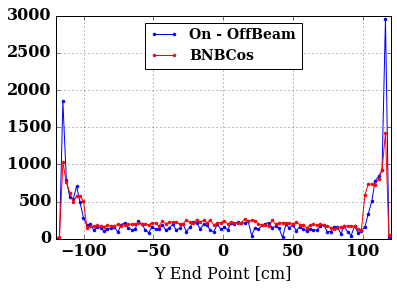

In [178]:
plt.plot(edges,end,'b',marker='.',label='On - OffBeam')
plt.plot(edges,mc_end * mc_to_onbeam,'r',marker='.',label='BNBCos')
plt.xlabel('Y End Point [cm]')
plt.xlim(-120,120)
plt.legend(fontsize=14,loc=9)
plt.ylim(0,3000)
plt.grid(True)


In [169]:
on_end, bins = np.histogram(df_beam_2.end_z.values,bins=100,range=(-10,1060))
off_end, _ = np.histogram(df_offbeam_2.end_z.values,bins=100,range=(-10,1060))
mc_end, _ = np.histogram(df_bnbcos_2.end_z.values,bins=100,range=(-10,1060))

end = on_end - off_end * off_to_on
edges = ( bins[1:] + bins[:-1] )*0.5

(-20, 1060)

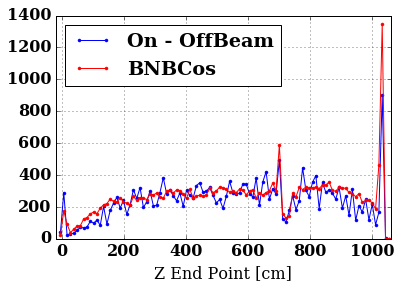

In [171]:
plt.plot(edges,end,'b',marker='.',label='On - OffBeam')
plt.plot(edges,mc_end * mc_to_onbeam,'r',marker='.',label='BNBCos')
plt.xlabel('Z End Point [cm]')
plt.legend(loc=2)
plt.grid(True)
#plt.ylim(0,200)
plt.xlim(-20,1060)


In [167]:
on_end, bins = np.histogram(df_beam_2.end_x.values,bins=100,range=(-10,280))
off_end, _ = np.histogram(df_offbeam_2.end_x.values,bins=100,range=(-10,280))
mc_end, _ = np.histogram(df_bnbcos_2.end_x.values,bins=100,range=(-10,280))

end = on_end - off_end * off_to_on
#print end
#print mc_end * mc_to_onbeam
edges = ( bins[1:] + bins[:-1] )*0.5

(-10, 265)

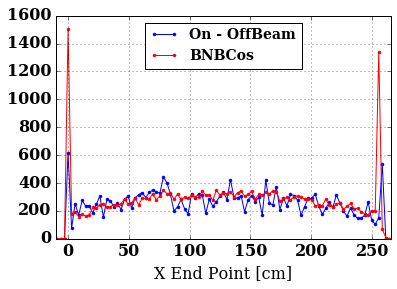

In [168]:
plt.plot(edges,end,'b',marker='.',label='On - OffBeam')
plt.plot(edges,mc_end * mc_to_onbeam,'r',marker='.',label='BNBCos')
plt.xlabel('X End Point [cm]')
plt.legend(loc=9,fontsize=14)
plt.grid(True)
plt.xlim(-10,265)


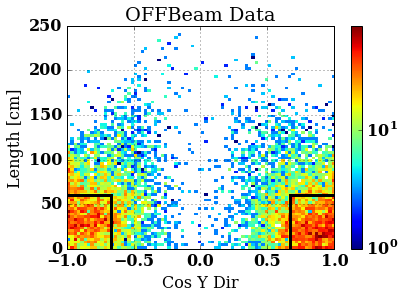

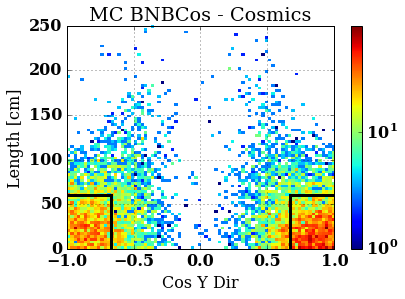

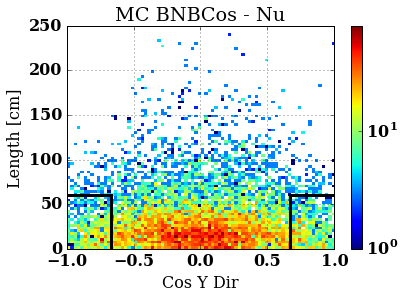

In [56]:
# on_end, bins = np.histogram(df_beam_2.dcosy_long.values,bins=100,range=(-1,1))
# off_end, _ = np.histogram(df_offbeam_2.dcosy_long.values,bins=100,range=(-1,1))
# mc_end, _ = np.histogram(df_bnbcos_2.dcosy_long.values,bins=100,range=(-1,1))

# end = on_end - off_end * off_to_on
# edges = ( bins[1:] + bins[:-1] )*0.5

# plt.plot(edges,end,'b',marker='.',label='On - OffBeam')
# plt.plot(edges,mc_end * mc_to_onbeam,'r',marker='.',label='BNBCos')
# plt.xlabel('CosY Dir')
# plt.legend(loc=9,fontsize=14)
# plt.grid(True)
# #plt.xlim(-10,265)

# on_end, bins = np.histogram(df_beam_2.tracklenshort.values,bins=100,range=(-1,300))
# off_end, _ = np.histogram(df_offbeam_2.tracklenshort.values,bins=100,range=(-1,300))
# mc_end, _ = np.histogram(df_bnbcos_2.tracklenshort.values,bins=100,range=(-1,300))

# end = on_end - off_end * off_to_on
# edges = ( bins[1:] + bins[:-1] )*0.5

#plt.figure()
#plt.plot(edges,end,'b',marker='.',label='On - OffBeam')
# plt.plot(edges,mc_end * mc_to_onbeam,'r',marker='.',label='BNBCos')
# plt.xlabel('Length [cm]')
# plt.legend(loc=9,fontsize=14)
# plt.grid(True)
# plt.title('OnBeam')
# #plt.xlim(-1,300)
# plt.ylim(0,1600)

df_offbeam_jh_2 = df_offbeam_2.query('jhighlong == 1')

plt.figure()
#plt.hist2d(abs(df_offbeam_jh_2.dcosy_long.values),df_offbeam_jh_2.tracklenshort.values,bins=80,\
#           label='OffBeam',norm=LogNorm(),range=[(0,1),(0,250)])
plt.hist2d(df_offbeam_2.dcosy_long.values,df_offbeam_2.tracklenshort.values,bins=80,\
           label='OffBeam',norm=LogNorm(),range=[(-1,1),(0,250)])
plt.title('OFFBeam Data')
plt.xlabel('Cos Y Dir')
plt.ylabel('Length [cm]')
plt.legend(loc=9,fontsize=14)
plt.plot((0.67,1),(60,60),color='k',lw=3)
plt.plot((0.67,0.67),(0,60),color='k',lw=3)
plt.plot((-0.67,-1),(60,60),color='k',lw=3)
plt.plot((-0.67,-0.67),(0,60),color='k',lw=3)

plt.grid(True)
plt.colorbar()

df_bnbcos_jh_2a = df_bnbcos_2.query('cosmic==1 and jhighlong == 1')
df_bnbcos_2a = df_bnbcos_2.query('cosmic==1 ')

plt.figure()
#plt.hist2d(abs(df_bnbcos_jh_2a.dcosy_long.values),df_bnbcos_jh_2a.tracklenshort.values,\
#           bins=80,norm=LogNorm(),range=[(0,1),(0,250)])
plt.hist2d(df_bnbcos_2a.dcosy_long.values,df_bnbcos_2a.tracklenshort.values,\
           bins=80,norm=LogNorm(),range=[(-1,1),(0,250)])
plt.xlabel('Cos Y Dir')
plt.ylabel('Length [cm]')
plt.title('MC BNBCos - Cosmics')
plt.plot((0.67,1),(60,60),color='k',lw=3)
plt.plot((0.67,0.67),(0,60),color='k',lw=3)
plt.plot((-0.67,-1),(60,60),color='k',lw=3)
plt.plot((-0.67,-0.67),(0,60),color='k',lw=3)
plt.legend(loc=9,fontsize=14)
plt.grid(True)
plt.colorbar()

df_bnbcos_jh_2a = df_bnbcos_2.query('cosmic==0 and jhighlong == 1')
df_bnbcos_2a = df_bnbcos_2.query('cosmic==0')

plt.figure()
#plt.hist2d(abs(df_bnbcos_jh_2a.dcosy_long.values),df_bnbcos_jh_2a.tracklenshort.values,\
#         bins=80,norm=LogNorm(),range=[(0,1),(0,250)])
plt.hist2d(df_bnbcos_2a.dcosy_long.values,df_bnbcos_2a.tracklenshort.values,\
           bins=80,norm=LogNorm(),range=[(-1,1),(0,250)])
plt.xlabel('Cos Y Dir')
plt.ylabel('Length [cm]')
plt.title('MC BNBCos - Nu')
plt.plot((0.67,1),(60,60),color='k',lw=3)
plt.plot((0.67,0.67),(0,60),color='k',lw=3)

plt.plot((-0.67,-1),(60,60),color='k',lw=3)
plt.plot((-0.67,-0.67),(0,60),color='k',lw=3)
plt.legend(loc=9,fontsize=14)
plt.grid(True)
plt.colorbar()

26616.2798423
23951.7441979
26565.8000521
23912.6831888


(0, 300)

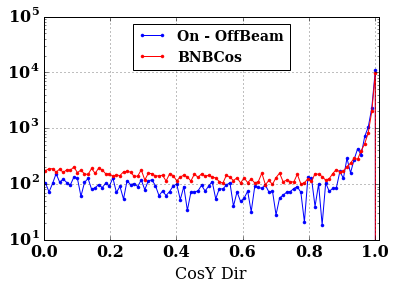

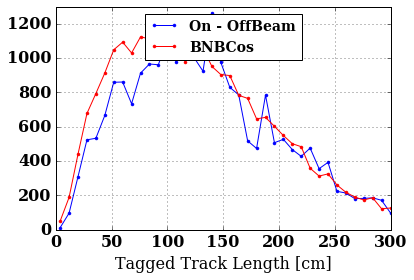

In [80]:
on_end, bins = np.histogram(df_beam_2.angleBtnTracks.values,bins=100,range=(0.,1.07))
off_end, _ = np.histogram(df_offbeam_2.angleBtnTracks.values,bins=100,range=(0.,1.07))
mc_end, _ = np.histogram(df_bnbcos_2.angleBtnTracks.values,bins=100,range=(0.,1.07))

end = on_end - off_end * off_to_on
edges = ( bins[1:] + bins[:-1] )*0.5

print np.cumsum(mc_end)[-1] * mc_to_onbeam
print np.cumsum(end)[-1] 

plt.plot(edges,end,'b',marker='.',label='On - OffBeam')
plt.plot(edges,mc_end * mc_to_onbeam,'r',marker='.',label='BNBCos')
plt.xlabel('CosY Dir')
plt.legend(loc=9,fontsize=14)
plt.grid(True)
plt.yscale('log')
plt.xlim(0.,1.01)


on_end, bins = np.histogram(df_beam_2.tracklenlong.values,bins=100,range=(0.,800))
off_end, _ = np.histogram(df_offbeam_2.tracklenlong.values,bins=100,range=(0.,800))
mc_end, _ = np.histogram(df_bnbcos_2.tracklenlong.values,bins=100,range=(0.,800))

end = on_end - off_end * off_to_on
edges = ( bins[1:] + bins[:-1] )*0.5

print np.cumsum(mc_end)[-1] * mc_to_onbeam
print np.cumsum(end)[-1] 
plt.figure()
plt.plot(edges,end,'b',marker='.',label='On - OffBeam')
plt.plot(edges,mc_end * mc_to_onbeam,'r',marker='.',label='BNBCos')
plt.xlabel('Tagged Track Length [cm]')
plt.legend(loc=9,fontsize=14)
plt.grid(True)
#plt.yscale('log')
plt.ylim(0,1300)
plt.xlim(0,300)

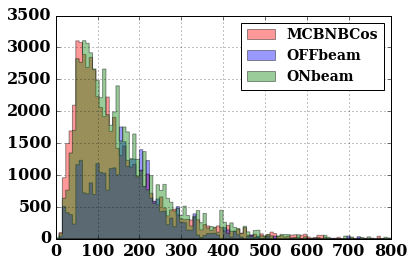

In [202]:
n=False #True
bnbcos = df_bnbcos_2.query('cosmic == 1')

plt.figure()
_,_,_ = plt.hist(df_bnbcos_2.len.values,bins=100,normed=n,label='MCBNBCos',histtype='stepfilled',alpha=0.4,color='r',range=(0,800))
_,_,_ = plt.hist(df_offbeam_2.len.values,bins=100,normed=n,label='OFFbeam',histtype='stepfilled',alpha=0.4,range=(0,800))
_,_,_ = plt.hist(df_beam_2.len.values,bins=100,normed=n,label='ONbeam',histtype='stepfilled',alpha=0.4,range=(0,800))
plt.grid(True)
#plt.title('Area normalized End Points')
#plt.xlim(-117,117)
plt.legend(fontsize=14)

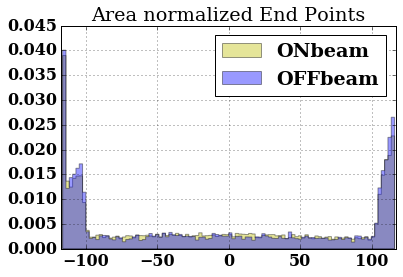

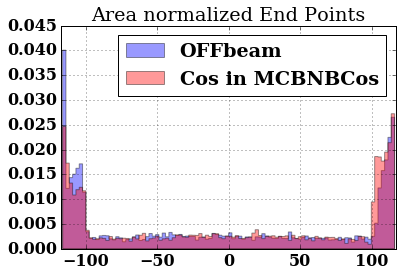

In [131]:
end = df_beam_2.end_y - df_offbeam_2.end_y * off_to_on
bnbcos = df_bnbcos_2.query('cosmic == 1')

end = np.histogram(df_beam_2.end_y.values,bins=100,range=(-117,117))

n=True
plt.figure()
_,_,_ = plt.hist(df_beam_2.end_y.values,bins=100,normed=n,label='ONbeam',histtype='stepfilled',alpha=0.4,range=(-116,116),color='y')
_,_,_ = plt.hist(df_offbeam_2.end_y.values,bins=100,normed=n,label='OFFbeam',histtype='stepfilled',alpha=0.4,range=(-116,116))
plt.grid(True)
plt.title('Area normalized End Points')
plt.xlim(-117,117)
plt.legend()

n=True
plt.figure()
_,_,_ = plt.hist(df_offbeam_2.end_y.values,bins=100,normed=n,label='OFFbeam',histtype='stepfilled',alpha=0.4,range=(-116,116))
_,_,_ = plt.hist(bnbcos.end_y.values,bins=100,normed=n,label='Cos in MCBNBCos',histtype='stepfilled',alpha=0.4,color='r',range=(-116,116))
plt.grid(True)
plt.title('Area normalized End Points')
plt.xlim(-117,117)
plt.legend()

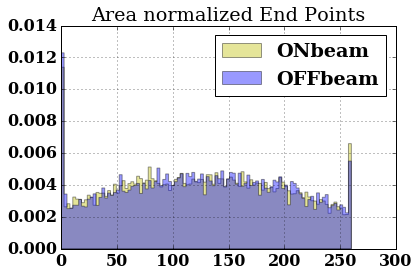

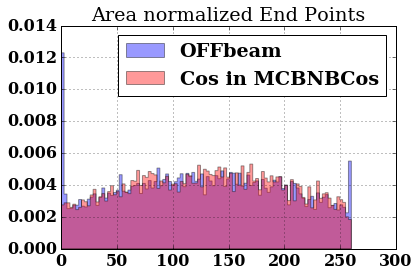

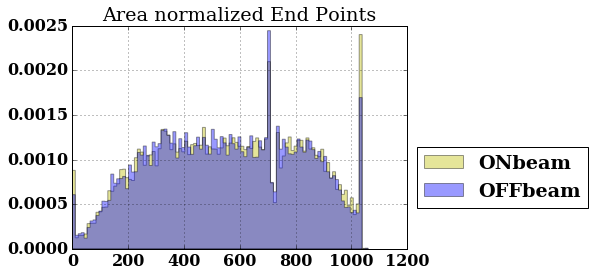

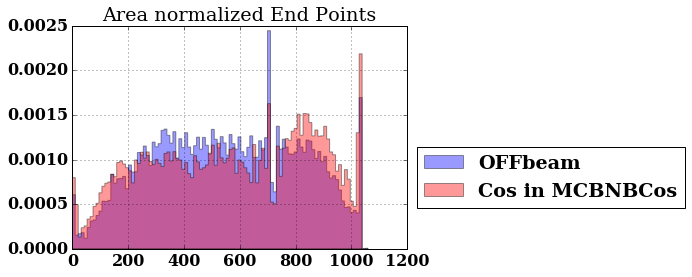

In [132]:
end = df_beam_2.end_x - df_offbeam_2.end_x * off_to_on
bnbcos = df_bnbcos_2.query('cosmic == 1')

n=True
plt.figure()
_,_,_ = plt.hist(df_beam_2.end_x.values,bins=100,normed=n,label='ONbeam',histtype='stepfilled',alpha=0.4,range=(0,260),color='y')
_,_,_ = plt.hist(df_offbeam_2.end_x.values,bins=100,normed=n,label='OFFbeam',histtype='stepfilled',alpha=0.4,range=(0,260))
plt.grid(True)
plt.title('Area normalized End Points')
plt.legend()

n=True
plt.figure()
_,_,_ = plt.hist(df_offbeam_2.end_x.values,bins=100,normed=n,label='OFFbeam',histtype='stepfilled',alpha=0.4,range=(0,260))
_,_,_ = plt.hist(bnbcos.end_x.values,bins=100,normed=n,label='Cos in MCBNBCos',histtype='stepfilled',alpha=0.4,color='r',range=(0,260.))
plt.grid(True)
plt.title('Area normalized End Points')
#plt.xlim(0,256)
plt.legend()

end = df_beam_2.end_z - df_offbeam_2.end_z * off_to_on
bnbcos = df_bnbcos_2.query('cosmic == 1')

n=True
plt.figure()
_,_,_ = plt.hist(df_beam_2.end_z.values,bins=100,normed=n,label='ONbeam',histtype='stepfilled',alpha=0.4,range=(0,1060),color='y')
_,_,_ = plt.hist(df_offbeam_2.end_z.values,bins=100,normed=n,label='OFFbeam',histtype='stepfilled',alpha=0.4,range=(0,1060))
plt.grid(True)
plt.title('Area normalized End Points')
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))

n=True
plt.figure()
_,_,_ = plt.hist(df_offbeam_2.end_z.values,bins=100,normed=n,label='OFFbeam',histtype='stepfilled',alpha=0.4,range=(0,1060))
_,_,_ = plt.hist(bnbcos.end_z.values,bins=100,normed=n,label='Cos in MCBNBCos',histtype='stepfilled',alpha=0.4,color='r',range=(0,1060.))
plt.grid(True)
plt.title('Area normalized End Points')
#plt.xlim(0,256)
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))

In [12]:
print "All : "
print " Total On - OffBeam : %i " % (df_beam.shape[0] - df_offbeam.shape[0] * off_to_on)
print " Total MCBNBCos     : %i "% (mc_to_onbeam * df_bnbcos.shape[0])
print " Final On - OffBeam : %i " % (df_beam_f.shape[0] - df_offbeam_f.shape[0] * off_to_on)
print " Final MCBNBCos     : %i "% (mc_to_onbeam * df_bnbcos_f.shape[0])

print
print "Mult 2 : "
print " Total Mult 2 On - OffBeam : %i " % (df_beam_f_2.shape[0] - df_offbeam_f_2.shape[0] * off_to_on)
print " Total Mult 2 MCBNBCos     : %i "% (mc_to_onbeam * df_bnbcos_f_2.shape[0])
print " Final Mult 2 w groupby Norm On - OffBeam : %i " % (beam_cut.shape[0] - offbeam_cut.shape[0] * off_to_on)
print " Final Mult 2 w groupby Norm MCBNBCos     : %i "% (mc_to_onbeam * bnbcos_cut.shape[0])

print
print " Total On - OffBeam : %i " % (df_beam_2.shape[0] - df_offbeam_2.shape[0] * off_to_on)
print " Total MCBNBCos     : %i "% (mc_to_onbeam * df_bnbcos_2.shape[0])
print " Cut dedx On - OffBeam : %i " % (df_beam_cut2.shape[0] - df_offbeam_cut2.shape[0] * off_to_on)
print " Cut dedx MCBNBCos     : %i "% (mc_to_onbeam * df_bnbcos_cut2.shape[0])
print " Cut Cosmic 3a On - OffBeam : %i " % (df_beam_2_cut3a.shape[0] - df_offbeam_2_cut3a.shape[0] * off_to_on)
print " Cut Cosmic 3a MCBNBCos     : %i "% (mc_to_onbeam * df_bnbcos_2_cut3a.shape[0])
print " Cut Angle 3b On - OffBeam : %i " % (df_beam_2_cut3b.shape[0] - df_offbeam_2_cut3b.shape[0] * off_to_on)
print " Cut Angle 3b MCBNBCos     : %i "% (mc_to_onbeam * df_bnbcos_2_cut3b.shape[0])

All : 
 Total On - OffBeam : 74785 
 Total MCBNBCos     : 76972 
 Final On - OffBeam : 2712 
 Final MCBNBCos     : 4177 

Mult 2 : 
 Total Mult 2 On - OffBeam : 1528 
 Total Mult 2 MCBNBCos     : 2595 
 Final Mult 2 w groupby Norm On - OffBeam : 1701 
 Final Mult 2 w groupby Norm MCBNBCos     : 3032 

 Total On - OffBeam : 23951 
 Total MCBNBCos     : 26616 
 Cut dedx On - OffBeam : 21355 
 Cut dedx MCBNBCos     : 23273 
 Cut Cosmic 3a On - OffBeam : 17149 
 Cut Cosmic 3a MCBNBCos     : 19467 
 Cut Angle 3b On - OffBeam : 6413 
 Cut Angle 3b MCBNBCos     : 10364 


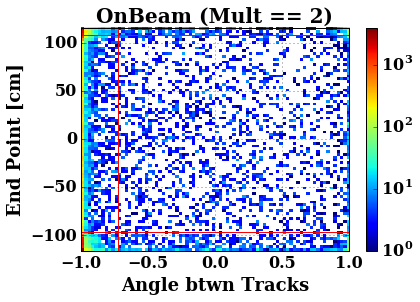

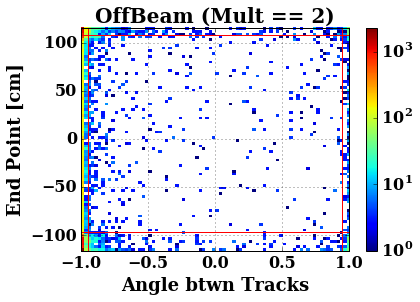

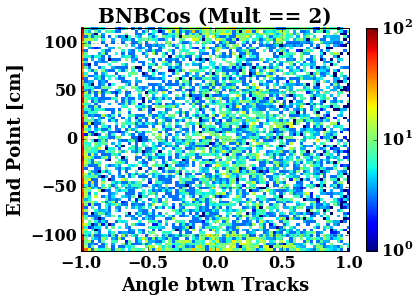

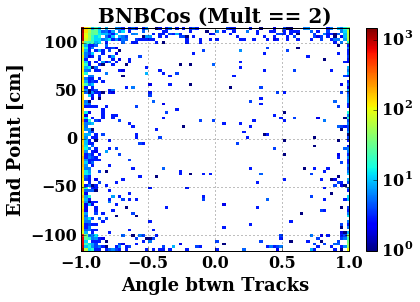

In [13]:
n= 80

plt.figure()
_ = plt.hist2d(df_beam_2.noabs_angle.values,df_beam_2.end_y.values,bins=n,\
               range=[(-1,1),(-116,116)],norm=LogNorm())
plt.grid(True)
plt.title('OnBeam (Mult == 2)',fontsize=20,weight='bold')
plt.xlabel('Angle btwn Tracks',fontsize=18,weight='bold')
plt.ylabel('End Point [cm]',fontsize=18,weight='bold')
plt.colorbar()
plt.axhline(108,color='r',lw=1)
plt.axhline(-96,color='r',lw=1)
plt.axvline(-0.72,color='r',lw=1)

plt.figure()
_ = plt.hist2d(df_offbeam_2.noabs_angle.values,df_offbeam_2.end_y.values,bins=n,\
               range=[(-1,1),(-116,116)],norm=LogNorm())
plt.grid(True)
plt.title('OffBeam (Mult == 2)',fontsize=20,weight='bold')
plt.xlabel('Angle btwn Tracks',fontsize=18,weight='bold')
plt.ylabel('End Point [cm]',fontsize=18,weight='bold')
plt.colorbar()
plt.axhline(108,color='r',lw=1)
plt.axhline(-96,color='r',lw=1)
plt.axvline(-0.95,color='r',lw=1)
plt.axvline(0.95,color='r',lw=1)


df_bnbcos_2_cos = df_bnbcos_2.query('cosmic == 1')
df_bnbcos_2_nu = df_bnbcos_2.query('cosmic == 0')


plt.figure()
_ = plt.hist2d(df_bnbcos_2_nu.noabs_angle.values,df_bnbcos_2_nu.end_y.values,bins=n,\
               range=[(-1,1),(-116,116)],norm=LogNorm())
#_ = plt.hist2d(df_bnbcos_2.noabs_angle.values,df_bnbcos_2.end_y.values,bins=n,\
#               range=[(-1,1),(-116,116)],norm=LogNorm())
plt.grid(True)
plt.title('BNBCos (Mult == 2)',fontsize=20,weight='bold')
plt.xlabel('Angle btwn Tracks',fontsize=18,weight='bold')
plt.ylabel('End Point [cm]',fontsize=18,weight='bold')
plt.colorbar()

plt.figure()
_ = plt.hist2d(df_bnbcos_2_cos.noabs_angle.values,df_bnbcos_2_cos.end_y.values,bins=n,\
               range=[(-1,1),(-116,116)],norm=LogNorm())
plt.grid(True)
plt.title('BNBCos (Mult == 2)',fontsize=20,weight='bold')
plt.xlabel('Angle btwn Tracks',fontsize=18,weight='bold')
plt.ylabel('End Point [cm]',fontsize=18,weight='bold')
plt.colorbar()


# plt.axhline(108,color='r',lw=1)
# plt.axhline(-96,color='r',lw=1)
# plt.axvline(-0.9,color='r',lw=1)
# plt.axvline(0.9,color='r',lw=1)

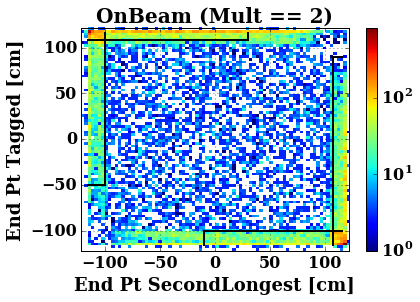

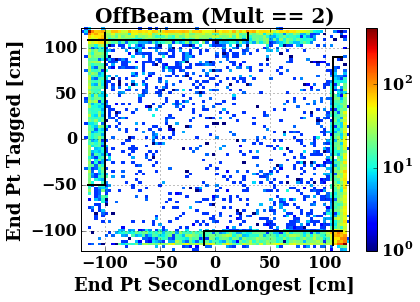

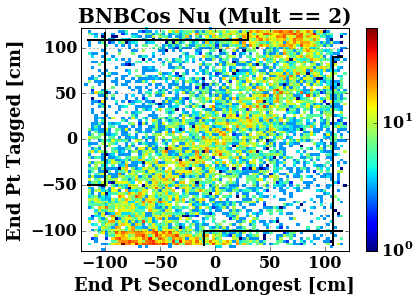

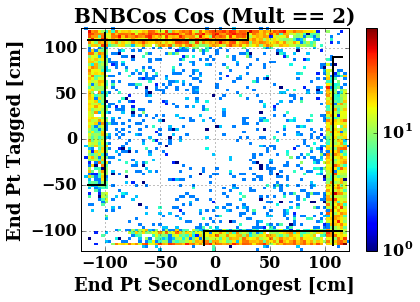

In [185]:
n= 80
mn = -122
mx = 122

plt.figure()
_ = plt.hist2d(df_beam_2.end_y_2nd.values,df_beam_2.end_y.values,bins=n,\
               range=[(mn,mx),(mn,mx)],norm=LogNorm())
plt.grid(True)
plt.title('OnBeam (Mult == 2)',fontsize=20,weight='bold')
plt.xlabel('End Pt SecondLongest [cm]',fontsize=18,weight='bold')
plt.ylabel('End Pt Tagged [cm]',fontsize=18,weight='bold')
plt.colorbar()
plt.plot((-10,-10),(-116,-100),color='k',lw=2)
plt.plot((-10,116),(-100,-100),color='k',lw=2)
plt.plot((30,30),(116,108),color='k',lw=2)
plt.plot((30,-116),(108,108),color='k',lw=2)
plt.plot((108,108),(-116,90),color='k',lw=2)
plt.plot((-100,-100),(-50,116),color='k',lw=2)
plt.plot((108,116),(90,90),color='k',lw=2)
plt.plot((-100,-116),(-50,-50),color='k',lw=2)


plt.figure()
_ = plt.hist2d(df_offbeam_2.end_y_2nd.values,df_offbeam_2.end_y.values,bins=n,\
               range=[(mn,mx),(mn,mx)],norm=LogNorm())
plt.grid(True)
plt.title('OffBeam (Mult == 2)',fontsize=20,weight='bold')
plt.xlabel('End Pt SecondLongest [cm]',fontsize=18,weight='bold')
plt.ylabel('End Pt Tagged [cm]',fontsize=18,weight='bold')
plt.colorbar()
plt.plot((-10,-10),(-116,-100),color='k',lw=2)
plt.plot((-10,116),(-100,-100),color='k',lw=2)
plt.plot((30,30),(116,108),color='k',lw=2)
plt.plot((30,-116),(108,108),color='k',lw=2)
plt.plot((108,108),(-116,90),color='k',lw=2)
plt.plot((-100,-100),(-50,116),color='k',lw=2)
plt.plot((108,116),(90,90),color='k',lw=2)
plt.plot((-100,-116),(-50,-50),color='k',lw=2)

plt.figure()
_ = plt.hist2d(df_bnbcos_2_nu.end_y_2nd.values,df_bnbcos_2_nu.end_y.values,bins=n,\
               range=[(mn,mx),(mn,mx)],norm=LogNorm())
plt.grid(True)
plt.title('BNBCos Nu (Mult == 2)',fontsize=20,weight='bold')
plt.xlabel('End Pt SecondLongest [cm]',fontsize=18,weight='bold')
plt.ylabel('End Pt Tagged [cm]',fontsize=18,weight='bold')
plt.plot((-10,-10),(-116,-100),color='k',lw=2)
plt.plot((-10,116),(-100,-100),color='k',lw=2)
plt.plot((30,30),(116,108),color='k',lw=2)
plt.plot((30,-116),(108,108),color='k',lw=2)
plt.plot((108,108),(-116,90),color='k',lw=2)
plt.plot((-100,-100),(-50,116),color='k',lw=2)
plt.plot((108,116),(90,90),color='k',lw=2)
plt.plot((-100,-116),(-50,-50),color='k',lw=2)
plt.colorbar()

plt.figure()
_ = plt.hist2d(df_bnbcos_2_cos.end_y_2nd.values,df_bnbcos_2_cos.end_y.values,bins=n,\
               range=[(mn,mx),(mn,mx)],norm=LogNorm())
plt.grid(True)
plt.title('BNBCos Cos (Mult == 2)',fontsize=20,weight='bold')
plt.xlabel('End Pt SecondLongest [cm]',fontsize=18,weight='bold')
plt.ylabel('End Pt Tagged [cm]',fontsize=18,weight='bold')

plt.colorbar()
plt.plot((-10,-10),(-116,-100),color='k',lw=2)
plt.plot((-10,116),(-100,-100),color='k',lw=2)
plt.plot((30,30),(116,108),color='k',lw=2)
plt.plot((30,-116),(108,108),color='k',lw=2)
plt.plot((108,108),(-116,90),color='k',lw=2)
plt.plot((-100,-100),(-50,116),color='k',lw=2)
plt.plot((108,116),(90,90),color='k',lw=2)
plt.plot((-100,-116),(-50,-50),color='k',lw=2)

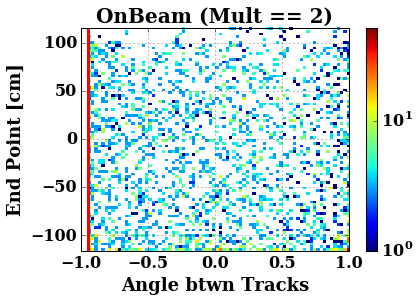

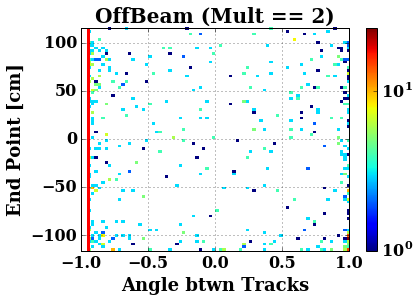

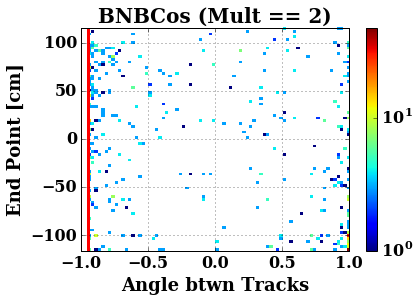

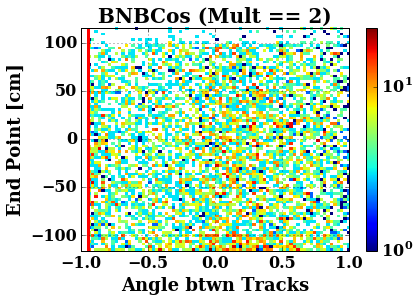

In [182]:

n= 80
plt.figure()
_ = plt.hist2d(df_beam_new_cut1.noabs_angle.values,df_beam_new_cut1.end_y.values,bins=n,\
               range=[(-1,1),(-116,116)],norm=LogNorm())
plt.grid(True)
plt.title('OnBeam (Mult == 2)',fontsize=20,weight='bold')
plt.xlabel('Angle btwn Tracks',fontsize=18,weight='bold')
plt.ylabel('End Point [cm]',fontsize=18,weight='bold')
plt.colorbar()
plt.axvline(-0.95,color='red',lw=3)


plt.figure()
_ = plt.hist2d(df_offbeam_new_cut1.noabs_angle.values,df_offbeam_new_cut1.end_y.values,bins=n,\
               range=[(-1,1),(-116,116)],norm=LogNorm())
plt.grid(True)
plt.title('OffBeam (Mult == 2)',fontsize=20,weight='bold')
plt.xlabel('Angle btwn Tracks',fontsize=18,weight='bold')
plt.ylabel('End Point [cm]',fontsize=18,weight='bold')
plt.axvline(-0.95,color='red',lw=3)
plt.colorbar()

cos = df_bnbcos_new_cut1.query('cosmic == 1')
nu = df_bnbcos_new_cut1.query('cosmic == 0')


plt.figure()
_ = plt.hist2d(cos.noabs_angle.values,cos.end_y.values,bins=n,\
               range=[(-1,1),(-116,116)],norm=LogNorm())
plt.grid(True)
plt.title('BNBCos (Mult == 2)',fontsize=20,weight='bold')
plt.xlabel('Angle btwn Tracks',fontsize=18,weight='bold')
plt.ylabel('End Point [cm]',fontsize=18,weight='bold')
plt.colorbar()
plt.axvline(-0.95,color='red',lw=3)


plt.figure()
_ = plt.hist2d(nu.noabs_angle.values,nu.end_y.values,bins=n,\
               range=[(-1,1),(-116,116)],norm=LogNorm())
plt.grid(True)
plt.title('BNBCos (Mult == 2)',fontsize=20,weight='bold')
plt.xlabel('Angle btwn Tracks',fontsize=18,weight='bold')
plt.ylabel('End Point [cm]',fontsize=18,weight='bold')
plt.colorbar()
plt.axvline(-0.95,color='red',lw=3)


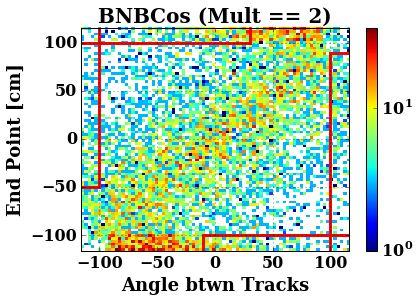

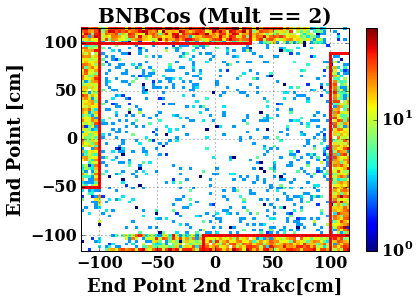

In [191]:
plt.figure()
_ = plt.hist2d(df_bnbcos_2_nu.end_y_2nd.values,df_bnbcos_2_nu.end_y.values,bins=n,\
               range=[(-116,116),(-116,116)],norm=LogNorm())
plt.grid(True)
plt.title('BNBCos (Mult == 2)',fontsize=20,weight='bold')
plt.xlabel('Angle btwn Tracks',fontsize=18,weight='bold')
plt.ylabel('End Point [cm]',fontsize=18,weight='bold')
plt.plot((-10,-10),(-116,-100),color='r',lw=3)
plt.plot((-10,116),(-100,-100),color='r',lw=3)
plt.plot((30,30),(116,100),color='r',lw=3)
plt.plot((30,-116),(100,100),color='r',lw=3)

plt.plot((100,100),(-116,90),color='r',lw=3)
plt.plot((-100,-100),(-50,116),color='r',lw=3)
plt.plot((100,116),(90,90),color='r',lw=3)
plt.plot((-100,-116),(-50,-50),color='r',lw=3)
plt.colorbar()


plt.figure()
_ = plt.hist2d(df_bnbcos_2_cos.end_y_2nd.values,df_bnbcos_2_cos.end_y.values,bins=n,\
               range=[(-116,116),(-116,116)],norm=LogNorm())
plt.grid(True)
plt.title('BNBCos (Mult == 2)',fontsize=20,weight='bold')
plt.xlabel('End Point 2nd Trakc[cm]',fontsize=18,weight='bold')
plt.ylabel('End Point [cm]',fontsize=18,weight='bold')
#plt.axhline(105,color='r',lw=1)
#plt.axvline(-100,color='r',lw=1)
#plt.axhline(-101,color='r',lw=1)
#plt.axvline(105,color='r',lw=1)
plt.plot((-10,-10),(-116,-100),color='r',lw=3)
plt.plot((-10,116),(-100,-100),color='r',lw=3)
plt.plot((30,30),(116,100),color='r',lw=3)
plt.plot((30,-116),(100,100),color='r',lw=3)
plt.plot((100,100),(-116,90),color='r',lw=3)
plt.plot((-100,-100),(-50,116),color='r',lw=3)
plt.plot((100,116),(90,90),color='r',lw=3)
plt.plot((-100,-116),(-50,-50),color='r',lw=3)

#if ( (end_y_2d > -100)
plt.colorbar()


In [ ]:
if ( (end_y_2nd > -100 or end_y < -50) and (end_y < 100 or end_y_2nd > 90)\
   and (end_y_2nd > -10 or end_y > -100) and (end_y_2nd <100 or end_y > 90))

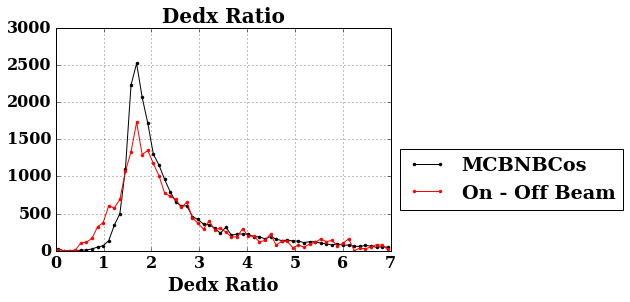

In [213]:
nbins = 60
Lmax = 7
Lmin = 0
var = 'dedx_start'
df0 = df_beam_2 
df1 = df_offbeam_2
df2 = df_bnbcos_2 

x_on, y_on = np.histogram(df0[var].values,bins=nbins,range=(Lmin,Lmax))
x_off, y_off = np.histogram(df1[var].values,bins=nbins,range=(Lmin,Lmax))
x_bnb, y_bnb = np.histogram(df2[var].values,bins=nbins,range=(Lmin,Lmax))

bins = (y_off[:-1] + y_off[1:])/2
off_min_on_m = x_on - x_off*off_to_on
bnbcos_m = x_bnb * mc_to_onbeam 
    
plt.figure()
plt.plot(bins,bnbcos_m,label='MCBNBCos',color='k',marker='.')
plt.plot(bins,off_min_on_m,color='r',label='On - Off Beam',marker='.')
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.xlabel('Dedx Ratio',fontsize=18,weight='bold')
plt.title('Dedx Ratio',fontsize=20,weight='bold')



In [197]:
def makeLenPlots(df_v, df_f_v,name_v,title):
    
    df0 = df_v[0]; df1 = df_v[1]; df2 = df_v[2]
    df_f0 = df_f_v[0]; df_f1 = df_f_v[1]; df_f2 = df_f_v[2]

    nbins = 60
    Lmax = 400
     
    x_on, y_on = np.histogram(df0.len.values,bins=nbins,range=(0,Lmax))
    x_off, y_off = np.histogram(df1.len.values,bins=nbins,range=(0,Lmax))
    x_bnb, y_bnb = np.histogram(df2.len.values,bins=nbins,range=(0,Lmax))

    bins = (y_off[:-1] + y_off[1:])/2
    off_min_on_m = x_on - x_off*off_to_on
    bnbcos_m = x_bnb * mc_to_onbeam 
    
    x_on_f, y_on = np.histogram(df_f0.len.values,bins=nbins,range=(0,Lmax))
    x_off_f, y_off_f = np.histogram(df_f1.len.values,bins=nbins,range=(0,Lmax))
    x_bnb_f, y_bnb = np.histogram(df_f2.len.values,bins=nbins,range=(0,Lmax))

    bins_f = (y_off_f[:-1] + y_off_f[1:])/2
    off_min_on_f = x_on_f - x_off_f*off_to_on
    bnbcos_f = x_bnb_f * mc_to_onbeam 
    
    plt.figure()
    plt.plot(bins,bnbcos_m,label='MC BNBCos',color='k',marker='.')
    plt.plot(bins,off_min_on_m,color='r',label='On - OffBeam',marker='.')
    plt.plot(bins_f,bnbcos_f,'k--',label='After MC BNBCos',marker='.')
    plt.plot(bins_f,off_min_on_f,'r--',label='After On - OffBeam',marker='.')
    plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
    plt.grid(True)
    plt.xlabel('Track Length [cm]',fontsize=18,weight='bold')
    plt.title(title,fontsize=20,weight='bold')
    
def makeAnglePlots(df0,df1,df2,name_v,title):
    
    nbins = 60
    Lmax = -0.8
    Lmin = -1
     
    x_on, y_on = np.histogram(df0.noabs_angle.values,bins=nbins,range=(Lmin,Lmax))
    x_off, y_off = np.histogram(df1.noabs_angle.values,bins=nbins,range=(Lmin,Lmax))
    x_bnb, y_bnb = np.histogram(df2.noabs_angle.values,bins=nbins,range=(Lmin,Lmax))

    bins = (y_off[:-1] + y_off[1:])/2
    off_min_on_m = x_on - x_off*off_to_on
    bnbcos_m = x_bnb * mc_to_onbeam 
    
    plt.figure()
    plt.plot(bins,bnbcos_m,label=name_v[1],color='k',marker='.')
    plt.plot(bins,off_min_on_m,color='r',label=name_v[0],marker='.')
    plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
    plt.grid(True)
    plt.xlabel('Angle Between Tracks',fontsize=18,weight='bold')
    plt.title(title,fontsize=20,weight='bold')
    
def makededxPlots(df0,df1,df2,name_v,title):
    
    nbins = 60
    Lmax = 50
     
    x_on, y_on = np.histogram(df0.dedx_start.values,bins=nbins,range=(0,Lmax))
    x_off, y_off = np.histogram(df1.dedx_start.values,bins=nbins,range=(0,Lmax))
    x_bnb, y_bnb = np.histogram(df2.dedx_start.values,bins=nbins,range=(0,Lmax))

    x_on_e, y_on = np.histogram(df0.dedx_end.values,bins=nbins,range=(0,Lmax))
    x_off_e, y_off = np.histogram(df1.dedx_end.values,bins=nbins,range=(0,Lmax))
    x_bnb_e, y_bnb = np.histogram(df2.dedx_end.values,bins=nbins,range=(0,Lmax))
        
    bins = (y_off[:-1] + y_off[1:])/2

    off_min_on_m = x_on - x_off*off_to_on
    bnbcos_m = x_bnb * mc_to_onbeam 
    off_min_on_e = x_on_e - x_off_e*off_to_on
    bnbcos_e = x_bnb_e * mc_to_onbeam 

    dedx_v = [ bnbcos_m, off_min_on_m, bnbcos_e, off_min_on_e ]
    it = 0
    c_v = ['r','k']
    plt.figure(figsize=(12,10))
    for i in xrange(0,len(dedx_v),2):

        #    it = 1
        plt.subplot(2,2,i+1)
        plt.plot(bins,dedx_v[i],label=name_v[it+1],color=c_v[it+1],marker='.')
        plt.plot(bins,dedx_v[i+1],label=name_v[it],color=c_v[it],marker='.')
        plt.legend(fontsize=14)#loc='upper left',bbox_to_anchor=(1,0.5))
        plt.grid(True)
        plt.xlabel('Dedx Start',fontsize=18,weight='bold')
        plt.ylim(0,10300)
        #plt.yscale('log')
        if i == 2:
            plt.xlabel('Dedx End',fontsize=18,weight='bold')
    #plt.title(title,fontsize=20,weight='bold')
    

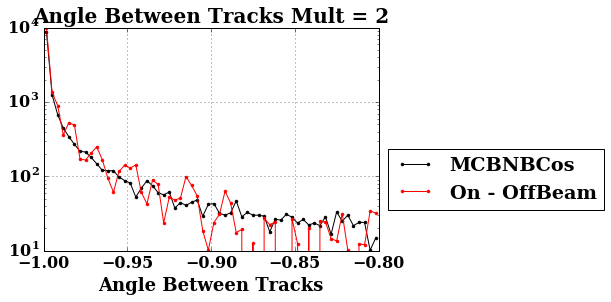

In [199]:
name_v = ['On - OffBeam','MCBNBCos']
title = 'Angle Between Tracks Mult = 2'
makeAnglePlots(df_beam_2,df_offbeam_2,df_bnbcos_2,name_v,title)
plt.yscale('log')
#makeAnglePlots(df_beam_gt1,df_offbeam_gt1,df_bnbcos_gt1,name_v,'Angle Between Tracks Mult > 1')

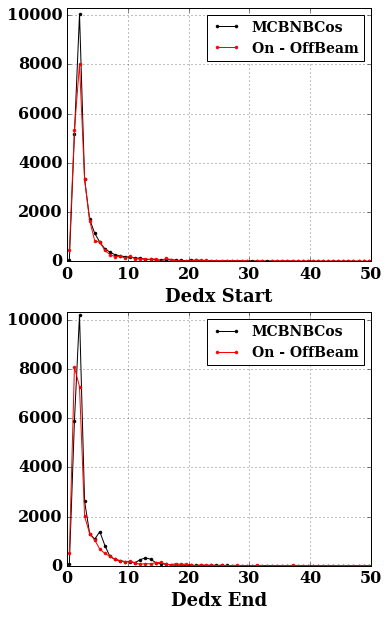

In [180]:
name_v = ['On - OffBeam','MCBNBCos']
title = 'dedx Mult = 2'

makededxPlots(df_beam_2,df_offbeam_2,df_bnbcos_2,name_v,title)
#makededxPlots(df_beam_1,df_offbeam_1,df_bnbcos_1,name_v,'dedx Mult = 1')
#plt.yscale('log')
#makeAnglePlots(df_beam_gt1,df_offbeam_gt1,df_bnbcos_gt1,name_v,'Angle Between Tracks Mult > 1')

(0, 2200)

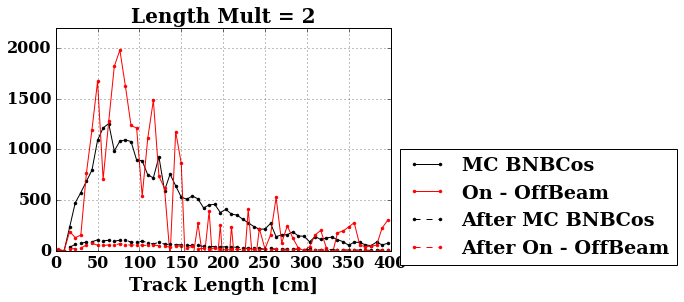

In [182]:
name_v = ['On - OffBeam','MCBNBCos']
title = 'Length Mult = 2'
#makeLenPlots(df_beam_1,df_offbeam_1,df_bnbcos_1,name_v,'Length Mult = 1')
#plt.ylim(0,3500)

df_v = [df_beam_2,df_offbeam_2,df_bnbcos_2]
df_f_v = [df_beam_f_2,df_offbeam_f_2,df_bnbcos_f_2]

makeLenPlots(df_v,df_f_v,name_v,title)
plt.ylim(0,2200)
#makeLenPlots(df_beam_gt1,df_offbeam_gt1,df_bnbcos_gt1,name_v,'Length Mult > 1')
#plt.ylim(0,2200)

In [187]:
def makeYEndPlots(df0,df1,df2,name_v,title):
    
    nbins = 60
    Lmax = 116
     
    x_on, y_on = np.histogram(df0.end_y.values,bins=nbins,range=(-116,Lmax))
    x_off, y_off = np.histogram(df1.end_y.values,bins=nbins,range=(-116,Lmax))
    x_bnb, y_bnb = np.histogram(df2.end_y.values,bins=nbins,range=(-116,Lmax))

    bins = (y_off[:-1] + y_off[1:])/2
    off_min_on_m = x_on - x_off*off_to_on
    bnbcos_m = x_bnb * mc_to_onbeam 
    
    plt.figure()
    plt.plot(bins,bnbcos_m,label=name_v[1],color='k',marker='.')
    plt.plot(bins,off_min_on_m,color='r',label=name_v[0],marker='.')
    plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
    plt.grid(True)
    plt.xlabel('End Point Y [cm]',fontsize=18,weight='bold')
    plt.title(title,fontsize=20,weight='bold')

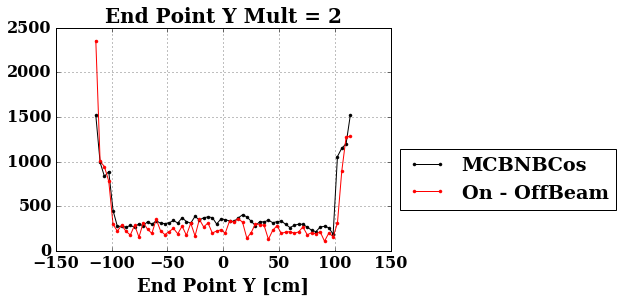

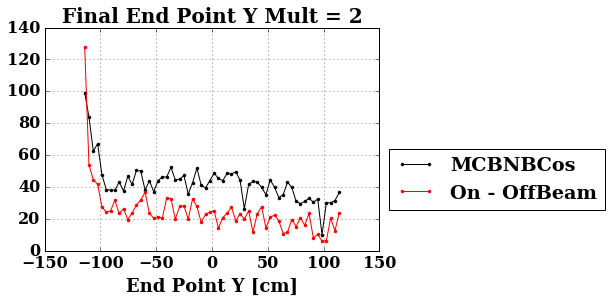

In [189]:
name_v = ['On - OffBeam','MCBNBCos']
title = 'End Point Y Mult = 2'
makeYEndPlots(df_beam_2,df_offbeam_2,df_bnbcos_2,name_v,title)
#plt.yscale('log')
makeYEndPlots(df_beam_f_2,df_offbeam_f_2,df_bnbcos_f_2,name_v,'Final End Point Y Mult = 2')

In [13]:
df['sce_mc_corr_x'] = [ df['mc_vtx_x'][i] + 0.7 - SCE.GetPosOffsets(df['mc_vtx_x'][i],\
                        df['mc_vtx_y'][i],df['mc_vtx_z'][i])[0] for i in xrange(df['mc_vtx_x'].shape[0])]

df['sce_mc_corr_y'] = [ df['mc_vtx_y'][i] + SCE.GetPosOffsets(df['mc_vtx_x'][i],\
                        df['mc_vtx_y'][i],df['mc_vtx_z'][i])[1] for i in xrange(df['mc_vtx_x'].shape[0])]

df['sce_mc_corr_z'] = [ df['mc_vtx_z'][i] + SCE.GetPosOffsets(df['mc_vtx_x'][i],\
                        df['mc_vtx_y'][i],df['mc_vtx_z'][i])[2] for i in xrange(df['mc_vtx_x'].shape[0])]

df['true_vtx_diff'] = np.sqrt(pow(df['sce_mc_corr_x'] - df['reco_vtx_x'],2) + pow(df['sce_mc_corr_y'] - df['reco_vtx_y'],2)\
                            + pow(df['sce_mc_corr_z'] - df['reco_vtx_z'],2))

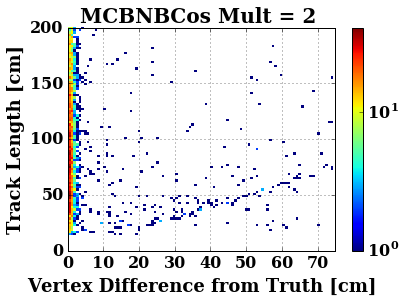

In [29]:
plt.figure()
_ = plt.hist2d(df_bnbcos_mult2.true_vtx_diff.values,df_bnbcos_mult2.len.values,bins=100,\
               range=[(0,75),(0,200)],norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.title('MCBNBCos Mult = 2 ',fontsize=20,weight='bold')
plt.xlabel('Vertex Difference from Truth [cm]',fontsize=18,weight='bold')
plt.colorbar()

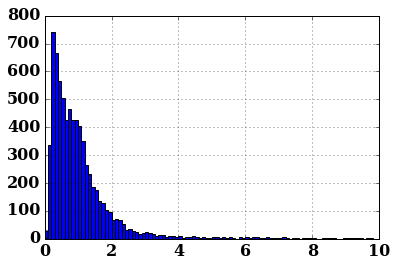

In [17]:
_,_,_ = plt.hist(df.true_vtx_diff,bins=100,range=(0,10))
plt.grid(True)
#_ = plt.hist2d(df.reco_vtx_y,df.true_vtx_diff,bins=100,range=[(-116,116),(0,500)])

In [18]:
df_beam_mult2 = df.query('mult == 2 and sample == 0')
df_offbeam_mult2 = df.query('mult == 2 and sample == 1')
df_bnbcos_mult2 = df.query('mult == 2 and sample == 2')
df_intime_mult2 = df.query('mult == 2 and sample == 3')

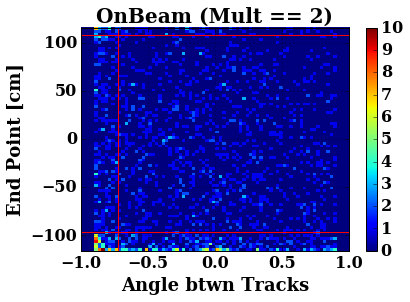

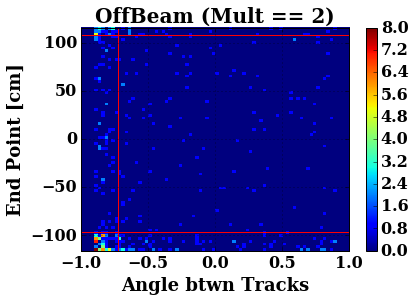

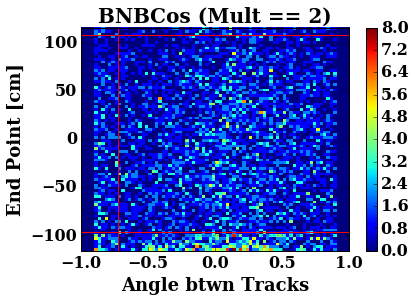

In [19]:
n= 80

plt.figure()
_ = plt.hist2d(df_beam_mult2.angleBtnTracks.values,df_beam_mult2.end_y.values,bins=n,\
               range=[(-1,1),(-116,116)])
plt.grid(True)
plt.title('OnBeam (Mult == 2)',fontsize=20,weight='bold')
plt.xlabel('Angle btwn Tracks',fontsize=18,weight='bold')
plt.ylabel('End Point [cm]',fontsize=18,weight='bold')
plt.colorbar()
plt.axhline(108,color='r',lw=1)
plt.axhline(-96,color='r',lw=1)
plt.axvline(-0.72,color='r',lw=1)

plt.figure()
_ = plt.hist2d(df_offbeam_mult2.angleBtnTracks.values,df_offbeam_mult2.end_y.values,bins=n,\
               range=[(-1,1),(-116,116)])
plt.grid(True)
plt.title('OffBeam (Mult == 2)',fontsize=20,weight='bold')
plt.xlabel('Angle btwn Tracks',fontsize=18,weight='bold')
plt.ylabel('End Point [cm]',fontsize=18,weight='bold')
plt.colorbar()
plt.axhline(108,color='r',lw=1)
plt.axhline(-96,color='r',lw=1)
plt.axvline(-0.72,color='r',lw=1)

plt.figure()
_ = plt.hist2d(df_bnbcos_mult2.angleBtnTracks.values,df_bnbcos_mult2.end_y.values,bins=n,\
               range=[(-1,1),(-116,116)])
plt.grid(True)
plt.title('BNBCos (Mult == 2)',fontsize=20,weight='bold')
plt.xlabel('Angle btwn Tracks',fontsize=18,weight='bold')
plt.ylabel('End Point [cm]',fontsize=18,weight='bold')
plt.colorbar()
plt.axhline(108,color='r',lw=1)
plt.axhline(-96,color='r',lw=1)
plt.axvline(-0.72,color='r',lw=1)


In [22]:
# Add in distances to wall as well for easy fv study
df_beam = df.query('sample == 0')
df_offbeam = df.query('sample == 1')
df_bnbcos = df.query('sample == 2')
df_intime = df.query('sample == 3')

df_beam_not = df.query('sample == 0 and mult != 2')
df_offbeam_not = df.query('sample == 1 and mult != 2')
df_bnbcos_not = df.query('sample == 2 and mult != 2')
df_intime_not = df.query('sample == 3 and mult != 2')

df_beam_2    = df.query('sample == 0 and mult == 2 and (angleBtnTracks > -0.72 or end_y < 108) and \
                          (angleBtnTracks > -0.65 or end_y > -96 )')
df_offbeam_2 = df.query('sample == 1 and mult == 2 and (angleBtnTracks > -0.72 or end_y < 108) and \
                          (angleBtnTracks > -0.65 or end_y > -96 )')
df_bnbcos_2 = df.query('sample == 2 and mult == 2 and (angleBtnTracks > -0.72 or end_y < 108) and \
                          (angleBtnTracks > -0.65 or end_y > -96 )')
df_intime_2 = df.query('sample == 3 and mult == 2 and (angleBtnTracks > -0.72 or end_y < 108) and \
                          (angleBtnTracks > -0.65 or end_y > -96 )')

print df_offbeam.shape #query('mult > 1').shape
print df_offbeam_2.shape
df_beam_cat = pd.concat([df_beam_2,df_beam_not])
df_offbeam_cat = pd.concat([df_offbeam_2,df_offbeam_not])
df_bnbcos_cat = pd.concat([df_bnbcos_2,df_bnbcos_not])
df_intime_cat = pd.concat([df_intime_2,df_intime_not])

(982, 50)
(323, 50)


In [23]:

#print "SEL 2: "
#print " OnBeam: ", df_beam.shape[0]
#print " OffBeam: ", df_offbeam.shape[0]
#print " BNBCos: ", df_bnbcos.shape[0]
#print " InTime: ", df_intime.shape[0]

print "SEL 2 Scaled: "
print " OnBeam: ", df_beam.shape[0]
print " OffBeam: ", df_offbeam.shape[0] * off_to_on
print " On - OffBeam: ", df_beam.shape[0] - df_offbeam.shape[0] * off_to_on 
print " BNBCos: ", df_bnbcos.shape[0] * mc_to_onbeam
print " Difference : ", df_bnbcos.shape[0] * mc_to_onbeam - (df_beam.shape[0] - df_offbeam.shape[0] * off_to_on )
#print " InTime: ", df_intime.shape[0] * intime_to_onbeam


print "\nCut Adjusts Scaled: "
print " OnBeam: ", df_beam_cat.shape[0]
print " OffBeam: ",df_offbeam_cat.shape[0] * off_to_on
print " On - OffBeam: ", df_beam_cat.shape[0] - df_offbeam_cat.shape[0] * off_to_on
print " BNBCos: ",df_bnbcos_cat.shape[0] * mc_to_onbeam
print " Difference : ", df_bnbcos_cat.shape[0] * mc_to_onbeam - (df_beam_cat.shape[0] - df_offbeam_cat.shape[0] * off_to_on )
#print " InTime: ",df_intime_cat.shape[0] * intime_to_onbeam

SEL 2 Scaled: 
 OnBeam:  3883
 OffBeam:  1170.07806498
 On - OffBeam:  2712.92193502
 BNBCos:  4241.69172946
 Difference :  1528.76979445

Cut Adjusts Scaled: 
 OnBeam:  3662
 OffBeam:  983.008557649
 On - OffBeam:  2678.99144235
 BNBCos:  4187.97011787
 Difference :  1508.97867552


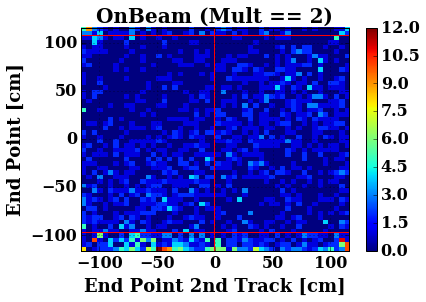

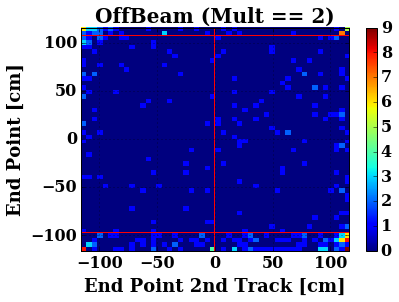

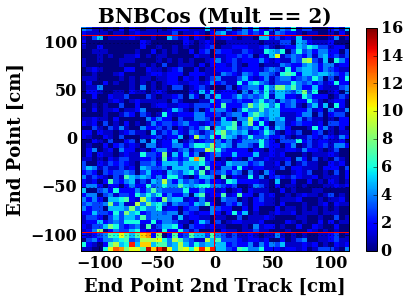

In [24]:
n= 50

plt.figure()
_ = plt.hist2d(df_beam_mult2.end_y_2nd.values,df_beam_mult2.end_y.values,bins=n,\
               range=[(-116,116),(-116,116)])
plt.grid(True)
plt.title('OnBeam (Mult == 2)',fontsize=20,weight='bold')
plt.xlabel('End Point 2nd Track [cm]',fontsize=18,weight='bold')
plt.ylabel('End Point [cm]',fontsize=18,weight='bold')
plt.colorbar()
plt.axhline(108,color='r',lw=1)
plt.axhline(-96,color='r',lw=1)
plt.axvline(-0.72,color='r',lw=1)

plt.figure()
_ = plt.hist2d(df_offbeam_mult2.end_y_2nd.values,df_offbeam_mult2.end_y.values,bins=n,\
               range=[(-116,116),(-116,116)])
plt.grid(True)
plt.title('OffBeam (Mult == 2)',fontsize=20,weight='bold')
plt.xlabel('End Point 2nd Track [cm]',fontsize=18,weight='bold')
plt.ylabel('End Point [cm]',fontsize=18,weight='bold')
plt.colorbar()
plt.axhline(108,color='r',lw=1)
plt.axhline(-96,color='r',lw=1)
plt.axvline(-0.72,color='r',lw=1)

plt.figure()
_ = plt.hist2d(df_bnbcos_mult2.end_y_2nd.values,df_bnbcos_mult2.end_y.values,bins=n,\
               range=[(-116,116),(-116,116)])
plt.grid(True)
plt.title('BNBCos (Mult == 2)',fontsize=20,weight='bold')
plt.xlabel('End Point 2nd Track [cm]',fontsize=18,weight='bold')
plt.ylabel('End Point [cm]',fontsize=18,weight='bold')
plt.colorbar()
plt.axhline(108,color='r',lw=1)
plt.axhline(-96,color='r',lw=1)
plt.axvline(-0.72,color='r',lw=1)

(0, 360)

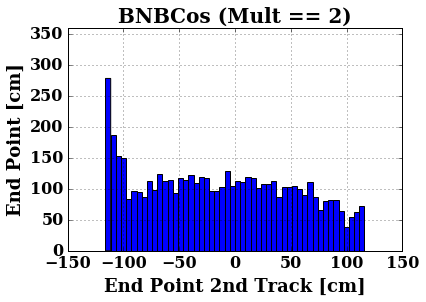

In [35]:
b = df_bnbcos.query('cosmic == 0 and mult == 2')

plt.figure()
_,_,_ = plt.hist(b.end_y.values,bins=n,\
               range=(-116,116))
plt.grid(True)
plt.title('BNBCos (Mult == 2)',fontsize=20,weight='bold')
plt.xlabel('End Point 2nd Track [cm]',fontsize=18,weight='bold')
plt.ylabel('End Point [cm]',fontsize=18,weight='bold')
plt.ylim(0,360)


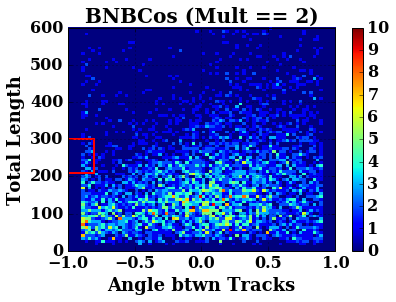

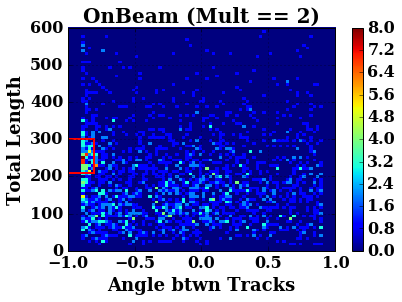

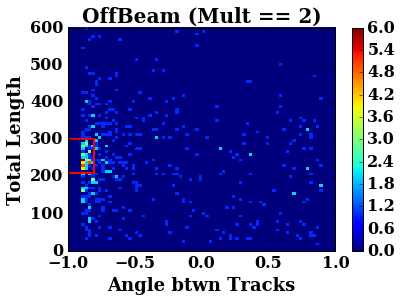

In [10]:
plt.figure()
_ = plt.hist2d(df_bnbcos_multgt1.angleBtnTracks.values,df_bnbcos_multgt1.tot_mult2_len.values,\
               bins=80,range=[(-1,1),(0,600)])
plt.grid(True)
plt.title('BNBCos (Mult == 2)',fontsize=20,weight='bold')
plt.xlabel('Angle btwn Tracks',fontsize=18,weight='bold')
plt.ylabel('Total Length',fontsize=18,weight='bold')
plt.colorbar()
plt.plot((-0.8,-0.8),(210,300),color='r',lw=2)
plt.plot((-1.,-0.8),(210,210),color='r',lw=2)
plt.plot((-1.,-0.8),(300,300),color='r',lw=2)

plt.figure()
_ = plt.hist2d(df_beam_multgt1.angleBtnTracks.values,df_beam_multgt1.tot_mult2_len.values,bins=80,\
               range=[(-1,1),(0,600)])#,norm=LogNorm())
plt.grid(True)
plt.title('OnBeam (Mult == 2)',fontsize=20,weight='bold')
plt.xlabel('Angle btwn Tracks',fontsize=18,weight='bold')
plt.ylabel('Total Length',fontsize=18,weight='bold')
plt.colorbar()
plt.plot((-0.8,-0.8),(210,300),color='r',lw=2)
plt.plot((-1.,-0.8),(210,210),color='r',lw=2)
plt.plot((-1.,-0.8),(300,300),color='r',lw=2)

plt.figure()
_ = plt.hist2d(df_offbeam_multgt1.angleBtnTracks.values,df_offbeam_multgt1.tot_mult2_len.values,bins=80,\
               range=[(-1,1),(0,600)])#,norm=LogNorm())
plt.grid(True)
plt.title('OffBeam (Mult == 2)',fontsize=20,weight='bold')
plt.xlabel('Angle btwn Tracks',fontsize=18,weight='bold')
plt.ylabel('Total Length',fontsize=18,weight='bold')
plt.colorbar()
plt.plot((-0.8,-0.8),(210,300),color='r',lw=2)
plt.plot((-1.,-0.8),(210,210),color='r',lw=2)
plt.plot((-1.,-0.8),(300,300),color='r',lw=2)

In [13]:
# Add in distances to wall as well for easy fv study
df_beam = df_cos.query('sample == 0')
df_offbeam = df_cos.query('sample == 1')
df_bnbcos = df_cos.query('sample == 2')
df_intime = df_cos.query('sample == 3')

print df_beam.shape[0],df_offbeam.shape[0], df_bnbcos.shape[0]
#print b.shape[0],ob.shape[0],bc.shape[0]

df_beam_not = df_cos.query('sample == 0 and mult != 2')
df_offbeam_not = df_cos.query('sample == 1 and mult != 2')
df_bnbcos_not = df_cos.query('sample == 2 and mult != 2')
df_intime_not = df_cos.query('sample == 3 and mult != 2')

df_beam_2    = df_cos.query('sample == 0 and mult == 2 and \
                            (angleBtnTracks > -0.8 or (tot_mult2_len < 210 and tot_mult2_len >300))')
df_offbeam_2 = df_cos.query('sample == 1 and mult == 2 and \
                            (angleBtnTracks > -0.8 or (tot_mult2_len < 210 and tot_mult2_len >300))')
df_bnbcos_2 = df_cos.query('sample == 2 and mult == 2 and \
                          (angleBtnTracks > -0.8 or (tot_mult2_len < 210 and tot_mult2_len >300))')
df_intime_2 = df_cos.query('sample == 3 and mult == 2 and \
                          (angleBtnTracks > -0.8 or (tot_mult2_len < 210 and tot_mult2_len >300))')

df_beam_cat = pd.concat([df_beam_2,df_beam_not])
df_offbeam_cat = pd.concat([df_offbeam_2,df_offbeam_not])
df_bnbcos_cat = pd.concat([df_bnbcos_2,df_bnbcos_not])
df_intime_cat = pd.concat([df_intime_2,df_intime_not])

 3883 982 9159


In [14]:
print "SEL 2: "
print " OnBeam: ", df_beam.shape[0]
print " OffBeam: ", df_offbeam.shape[0]
print " BNBCos: ", df_bnbcos.shape[0]
print " InTime: ", df_intime.shape[0]

print "SEL 2 Scaled: "
print " OnBeam: %.0f"% df_beam.shape[0]
print " OffBeam: %.2f"% (df_offbeam.shape[0] * off_to_on)
print " On - OffBeam: %.2f" % (df_beam.shape[0] - df_offbeam.shape[0] * off_to_on)
print " BNBCos: %.2f"% (df_bnbcos.shape[0] * mc_to_onbeam)
#print " InTime: %.2f"% (df_intime.shape[0] * intime_to_onbeam)


print "\nCut Adjusts Scaled: "
print " OnBeam: ", df_beam_cat.shape[0]
print " OffBeam: ",df_offbeam_cat.shape[0] * off_to_on
print " On - OffBeam: ", df_beam_cat.shape[0] - df_offbeam_cat.shape[0] * off_to_on
print " BNBCos: ",df_bnbcos_cat.shape[0] * mc_to_onbeam
#print " InTime: ",df_intime_cat.shape[0] * intime_to_onbeam


SEL 2: 
 OnBeam:  3883
 OffBeam:  982
 BNBCos:  9159
 InTime:  146
SEL 2 Scaled: 
 OnBeam: 3883
 OffBeam: 1170.08
 On - OffBeam: 2712.92
 BNBCos: 4241.69

Cut Adjusts Scaled: 
 OnBeam:  3562
 OffBeam:  968.710251355
 On - OffBeam:  2593.28974864
 BNBCos:  4080.99001201


In [15]:
b = df_beam_multgt1.query('(angleBtnTracks > -0.72 or end_y < 108) and \
                          (angleBtnTracks > -0.65 or end_y > -96 )')
ob = df_offbeam_multgt1.query('(angleBtnTracks > -0.72 or end_y < 108) and \
                          (angleBtnTracks > -0.65 or end_y > -96 )')
bc = df_bnbcos_multgt1.query('(angleBtnTracks > -0.72 or end_y < 108) and \
                          (angleBtnTracks > -0.65 or end_y > -96 )')

In [16]:
# Add in distances to wall as well for easy fv study
df_beam = df_cos.query('sample == 0')
df_offbeam = df_cos.query('sample == 1')
df_bnbcos = df_cos.query('sample == 2')
df_intime = df_cos.query('sample == 3')

print df_beam.shape[0],df_offbeam.shape[0], df_bnbcos.shape[0]
print b.shape[0],ob.shape[0],bc.shape[0]

df_beam_not = df_cos.query('sample == 0 and mult != 2')
df_offbeam_not = df_cos.query('sample == 1 and mult != 2')
df_bnbcos_not = df_cos.query('sample == 2 and mult != 2')
df_intime_not = df_cos.query('sample == 3 and mult != 2')

df_beam_2    = df_cos.query('sample == 0 and mult == 2 and (angleBtnTracks > -0.72 or end_y < 108) and \
                          (angleBtnTracks > -0.65 or end_y > -96 )')
df_offbeam_2 = df_cos.query('sample == 1 and mult == 2 and (angleBtnTracks > -0.72 or end_y < 108) and \
                          (angleBtnTracks > -0.65 or end_y > -96 )')
df_bnbcos_2 = df_cos.query('sample == 2 and mult == 2 and (angleBtnTracks > -0.72 or end_y < 108) and \
                          (angleBtnTracks > -0.65 or end_y > -96 )')
df_intime_2 = df_cos.query('sample == 3 and mult == 2 and (angleBtnTracks > -0.72 or end_y < 108) and \
                          (angleBtnTracks > -0.65 or end_y > -96 )')

df_beam_cat = pd.concat([df_beam_2,df_beam_not])
df_offbeam_cat = pd.concat([df_offbeam_2,df_offbeam_not])
df_bnbcos_cat = pd.concat([df_bnbcos_2,df_bnbcos_not])
df_intime_cat = pd.concat([df_intime_2,df_intime_not])

3883 982 9159
1877 323 5497


In [17]:

#print "SEL 2: "
#print " OnBeam: ", df_beam.shape[0]
#print " OffBeam: ", df_offbeam.shape[0]
#print " BNBCos: ", df_bnbcos.shape[0]
#print " InTime: ", df_intime.shape[0]

print "SEL 2 Scaled: "
print " OnBeam: ", df_beam.shape[0]
print " OffBeam: ", df_offbeam.shape[0] * off_to_on
print " On - OffBeam: ", df_beam.shape[0] - df_offbeam.shape[0] * off_to_on 
print " BNBCos: ", df_bnbcos.shape[0] * mc_to_onbeam
#print " InTime: ", df_intime.shape[0] * intime_to_onbeam


print "\nCut Adjusts Scaled: "
print " OnBeam: ", df_beam_cat.shape[0]
print " OffBeam: ",df_offbeam_cat.shape[0] * off_to_on
print " On - OffBeam: ", df_beam_cat.shape[0] - df_offbeam_cat.shape[0] * off_to_on
print " BNBCos: ",df_bnbcos_cat.shape[0] * mc_to_onbeam
#print " InTime: ",df_intime_cat.shape[0] * intime_to_onbeam


SEL 2 Scaled: 
 OnBeam:  3883
 OffBeam:  1170.07806498
 On - OffBeam:  2712.92193502
 BNBCos:  4241.69172946

Cut Adjusts Scaled: 
 OnBeam:  3662
 OffBeam:  983.008557649
 On - OffBeam:  2678.99144235
 BNBCos:  4187.97011787


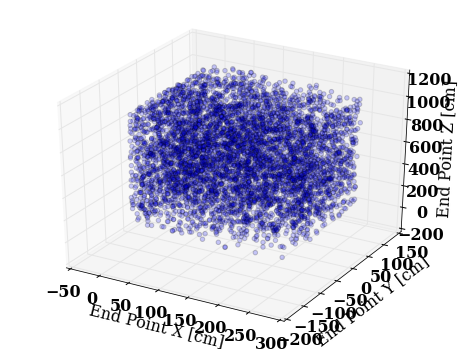

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_bnbcos_multgt1.end_x.values,df_bnbcos_multgt1.end_y.values,\
            df_bnbcos_multgt1.end_z.values,'k.',alpha=0.2)
ax.set_xlabel('End Point X [cm]')
ax.set_ylabel('End Point Y [cm]')
ax.set_zlabel('End Point Z [cm]')

